In [1]:
#In this project we will analyze 911 data from Kaggle: https://www.kaggle.com/datasets/mchirico/montcoalert?resource=download


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from collections import Counter

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
Df = pd.read_csv('911.csv')

In [5]:
#Checking the info of Df
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
Df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
#Description of the variables:
#lat = Latitude
#lng = Longitude
#desc = Description of the Emergency Call
#zip = Zipcode
#title = Title
#timeStamp = YYYY-MM-DD HH:MM:SS
#twp = Township
#addr = Address
#e = Dummy variable (always 1)

In [8]:
#We can use the information of the Dataframe to answer some questions:

#What are the top 5 zipcodes for 911 calls?
Df['zip'].value_counts().head()


19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [9]:
#What are the top 5 townships for 911 calls?

Df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

<BarContainer object of 5 artists>

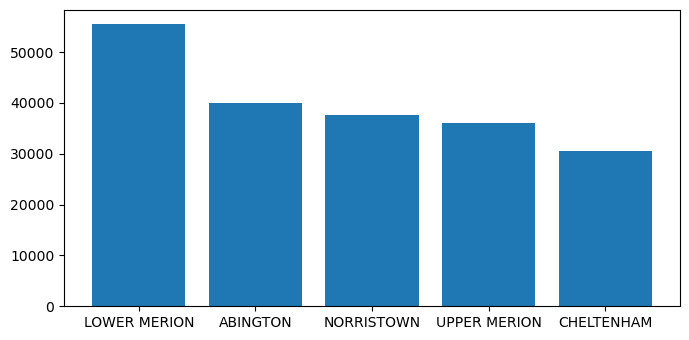

In [10]:
#Sort the towns accordlying to the number of calls max number of calls
Frequency = Df['twp'].value_counts().head()

#Data points - two lists: the index of the series Frequency (Towns), and the number of calls
Towns=list(Frequency.index) 
Number_calls=list(Frequency)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.bar(Towns, Number_calls)

In [11]:
#Creating new features:

#Let's create a new column called 'Department' containing the string
#value 'EMS', 'Fire' or 'Traffic'

List_1=list(Df['title'])
List_2=[]
def department_func(word):
    if 'EMS' in word:
        return 'EMS'
    elif 'Fire' in word:
        return 'Fire'
    elif 'Traffic' in word:
        return 'Traffic'

for i in List_1:
    x=department_func(i)
    List_2.append(x)
    
#Adding the columns
Df['Department']=List_2
#Droping the columns 'e' from the Data Frame
#Df.drop('e',axis=1,inplace=True)

<Axes: xlabel='Department', ylabel='count'>

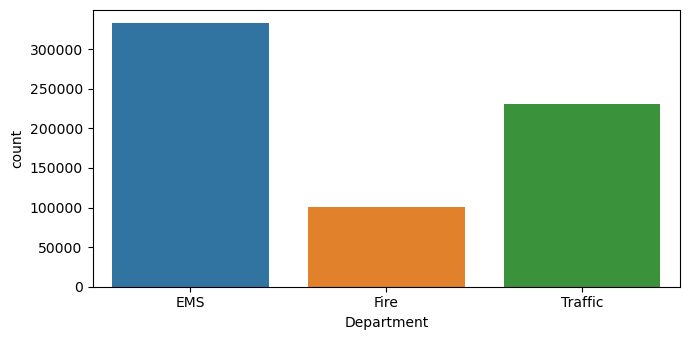

In [12]:
#Creating a countplot of 911 calls by Department
sns.countplot(x='Department',data=Df)

In [13]:
#Check the data type of column timeStamp
type(Df['timeStamp'][0])

str

In [14]:
#Check if all elements in timeStamp column are strings
i=0 #count the number of non strings rows
Index=[]
for index in range(0,len(Df['timeStamp'].index)):
    if type(Df['timeStamp'][index])!=str:
        i+=1
        Index.append(i)#save the index of non string rows

print('Number of non string rows:', i)
        
    
#Mask_timeStamp=Df['timeStamp']==str
#Mask_timeStamp

Number of non string rows: 0


In [15]:
#Convert the column of strings timeStamp into DateTime objects
Ser=pd.to_datetime(Df['timeStamp'])
Df['timeStamp']=Ser

In [16]:
#Now, any cell of the column timeStamp stores a Datetime object
#Create three more columns: Hour, Month and Day of Week.

def time_func(time):
    y1 = time.hour
    y2 = time.minute
    y3 = time.second
    List=[y1,':', y2,':',y3]
    y=' '.join(str(e) for e in List)
    return y

def month_func(Month):
    M=['January','February', 'March', 'April', 'May',\
      'June', 'July', 'August', 'September', 'October',\
      'November', 'December']
    m=Month.month
    return M[m-1]

def dayweek_func(Day):
    D=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday',\
       'Saturday','Sunday']
    d=Day.weekday()
    return D[d]

Df['Hour']=Df['timeStamp'].apply(lambda x: time_func(x))
Df['Month']=Df['timeStamp'].apply(lambda x: month_func(x))
Df['Day of Week']=Df['timeStamp'].apply(lambda x:dayweek_func(x))


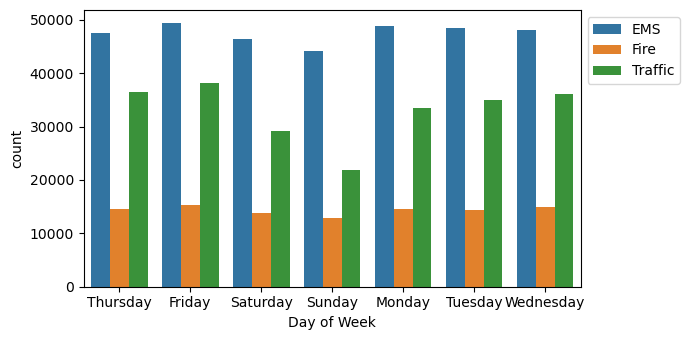

In [17]:
#Creating a countplot of the Day of Week, Department columns:
ax=sns.countplot(x='Day of Week',data=Df, hue='Department')
plt.legend(shadow=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

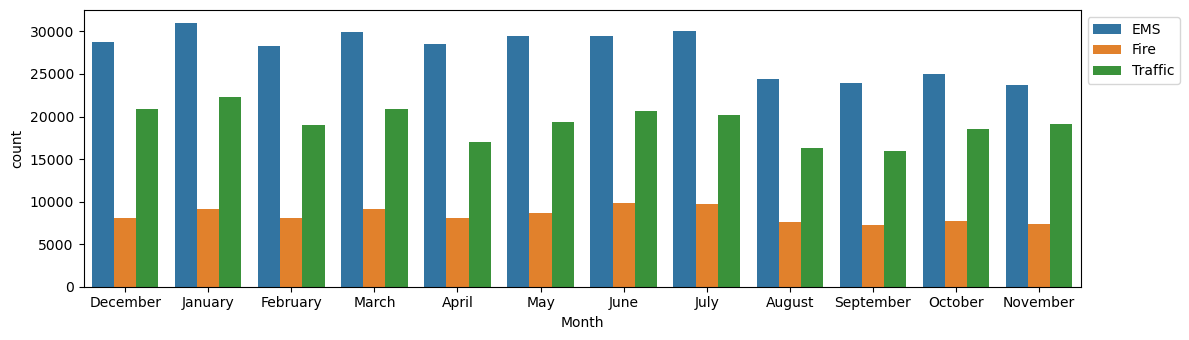

In [18]:
#Creating a countplot of the Month, Department columns:

# Set the figure size
plt.rcParams["figure.figsize"] = [12.00, 3.50]
plt.rcParams["figure.autolayout"] = True

ax=sns.countplot(x='Month',data=Df, hue='Department')
plt.legend(shadow=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [24]:
#Let's plot the information in a simple line plot:
Df_1=Df.groupby('Month').count()

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Number of calls')]

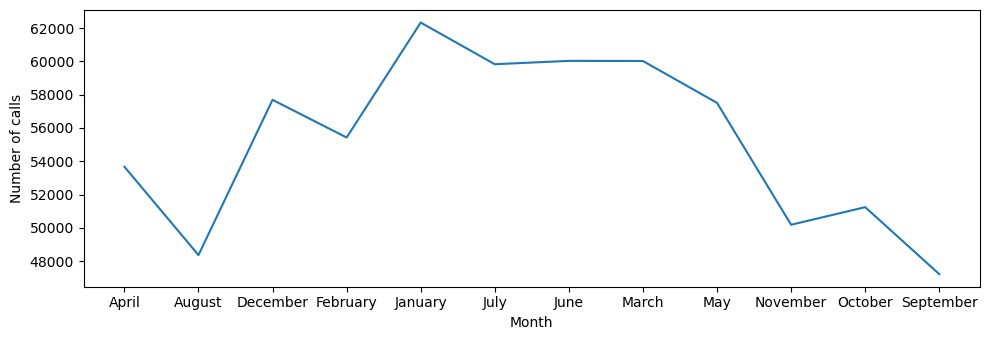

In [28]:
# Set the figure size
plt.rcParams["figure.figsize"] = [10.00, 3.50]
plt.rcParams["figure.autolayout"] = True

ax=sns.lineplot(x="Month", y="e",data=Df_1)
ax.set(xlabel='Month', ylabel='Number of calls')